In [1]:
import random
import numpy as np
from scipy.stats import bernoulli

def sign(i):
    return -1*(i < 0) + 1*(i >= 0)

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def random_walk(n):
    """ Returns a random walk of n steps """
    walk, sites = np.zeros(n), np.zeros(n)
    for i in range(n-1):
        walk[i+1] = walk[i] + random.choice([-1,1])
        sites[i+1] = walk[i+1]
    return walk, sites

def retraction_walk(n, p):
    """ Returns a random walk with a bias that attracts it to its original value """
    walk, sites = np.zeros(n), np.zeros(n)
    for i in range(n-1):
        walk[i+1] = walk[i] + sign(walk[i])*(2*bernoulli.rvs(p, loc=0, size=1) - 1)
        sites[i+1] = walk[i+1]
    return walk, sites

def random_queue(n, la):
    """ Returns a random walk simulating the number of people in a queue """
    walk, sites = np.zeros(n), np.zeros(n)
    for i in range(n-1):
        walk[i+1] = max(walk[i]-1,0) + np.random.poisson(la)
        sites[i+1] = walk[i+1]
    return walk, sites

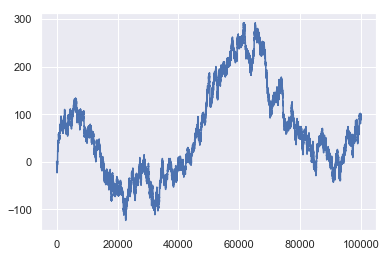

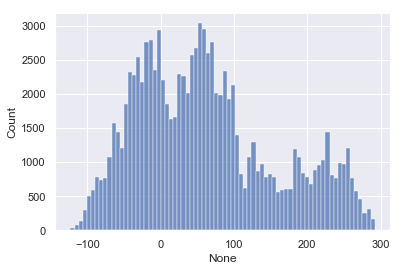

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

n, p = 100000, .45
x = np.linspace(0,n,n)
walk, sites = random_walk(n)
walk_re, sites_re = retraction_walk(n, p)

plt.figure(1)
plt.plot(x, walk, '-b')
plt.figure(2)
sns.histplot(sites)
plt.show()

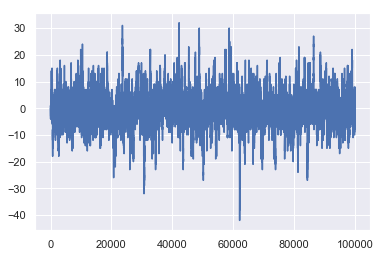

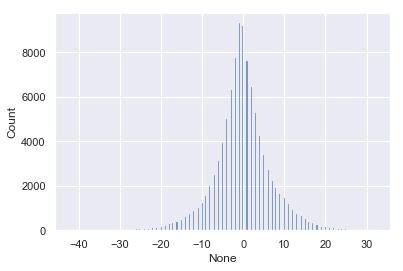

In [3]:
plt.figure(1)
plt.plot(x, walk_re, '-b')
plt.figure(2)
sns.histplot(sites_re, kde=False);
plt.show()

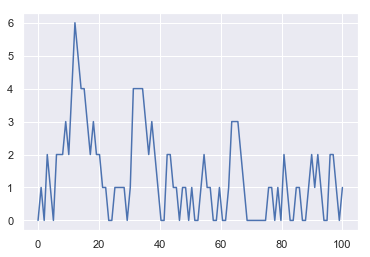

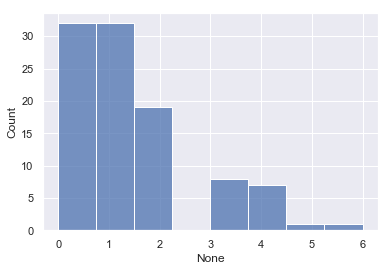

In [4]:
n = 100
queue_conv, sites_q_c = random_queue(n, .8)
queue_div, sites_q_d = random_queue(n, 1.2)
x = np.linspace(0,n,n)

plt.figure(1)
plt.plot(x, queue_conv, '-b')
plt.figure(2)
sns.histplot(sites_q_c)
plt.show()

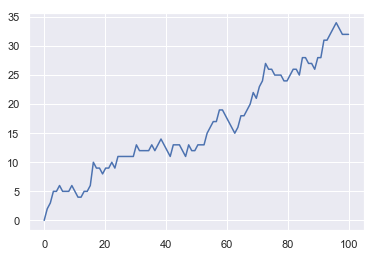

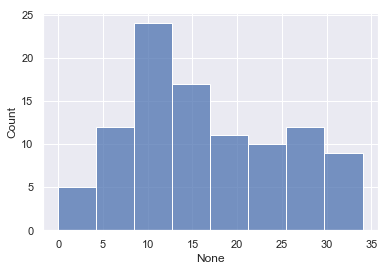

In [5]:
plt.figure(1)
plt.plot(x, queue_div, '-b')
plt.figure(2)
sns.histplot(sites_q_d)
plt.show()

In [6]:
def ruin(a, b, p = .5):
    """ Two players with fortune a and b compete in a possibly biased zero sum game
        Each turn the winner gets 1 point , the game stops when one player is broke
        Returns the number of drafts the walk and the winner 0 or 1 """
    walk, steps = [a], 0
    while (walk[steps] > 0) and (a + b - walk[steps] > 0):
        walk.append(walk[steps] + 2*bernoulli.rvs(p, loc=0, size=1) - 1)
        steps = steps + 1
    if walk[steps] == 0:
        return walk, steps, 0
    else:
        return walk, steps, 1

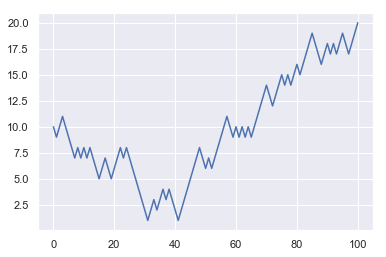

1


In [7]:
game, steps, winner = ruin(10, 10)
plt.figure(1)
plt.plot(np.linspace(0, steps, steps+1), game, '-b')
plt.show()

print(winner)

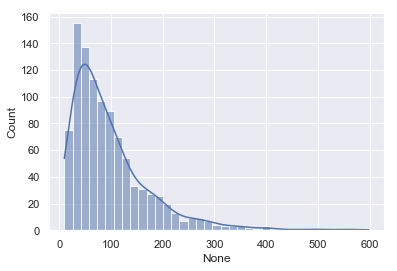

In [8]:
K = 1000 # Number of games between player 0 and player 1
a, b, p = 10, 10, .5
T = np.zeros(K)
for k in range(K):
    game, steps, winner = ruin(a, b, p)
    T[k] = steps

plt.figure(1)
sns.histplot(T, kde=True)
plt.show()